<a href="https://colab.research.google.com/github/LalithaJanneti/House-price-prediction/blob/main/TheoriticalLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#class definition and intialization
class LinearRegression:
  def __init__(self):
    self.slope=0
    self.intercept=0
#fitting the model
  def fit(self,x,y):
    x_mean=sum(x)/len(x)
    y_mean=sum(y)/len(y)

    numerator=sum((x[i]-x_mean)*(y[i]-y_mean) for i in range(len(x)))
    denominator=sum((x[i]-x_mean)**2 for i in range(len(x)))

    self.slope = numerator/denominator
    self.intercept =y_mean - self.slope * x_mean
#predicting the model as y=mX+c
  def predict(self,X):
    return [self.slope *x +self.intercept for x in X]

#getting parameters
  def get_params(self):
    return self.slope,self.intercept
#sample run
  x=np.array([1,2,3,4,5]).reshape(-1,1)
  y=np.array([2,4,5,4,5]).reshape(-1,1)

#train the model
  model = LinearRegression()
  model.fit(x,y)

#predictions
  predictions = model.predict(x)
  print("predicted values:",predictions)

  print("slope:",model.coef_)
  print("intercept:",model.intercept_)

predicted values: [[2.8]
 [3.4]
 [4. ]
 [4.6]
 [5.2]]
slope: [[0.6]]
intercept: [2.2]


In [11]:
from ast import MatchSequence
#import library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
import numpy as np

X=[1,2,3,4,5]
y=[2,4,5,4,5]
#reshape X and y to be 2d arraya
X=np.array(X).reshape(-1,1)
y=np.array(y).reshape(-1,1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#fit classifer on train set
reg=LinearRegression().fit(X_train,y_train)

#predict on test set
y_pred = reg.predict(X_test)

#evalute on test set: root mean square error
rmse =MSE(y_test,y_pred)**0.5

#peturn coefficients (theta) and intercept
print("coefficients: {}".format(reg.coef_))
print("Intercept:{}".format(reg.intercept_))

coefficients: [[0.68571429]]
Intercept:[1.77142857]


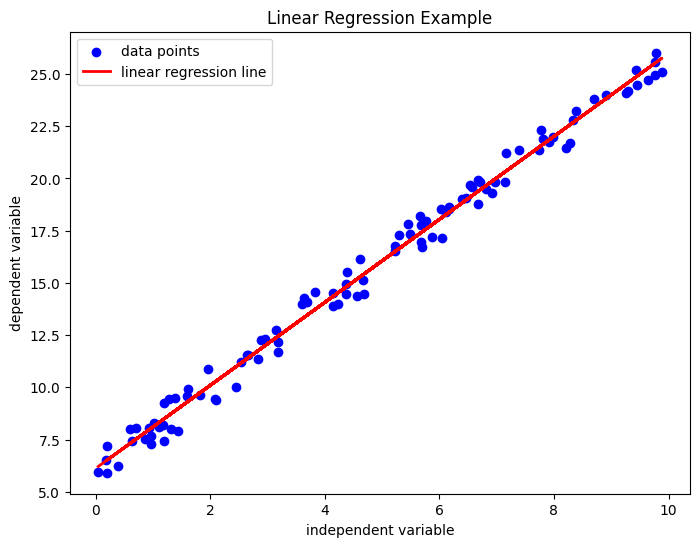

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#generate sample data
np.random.seed(0)
X=np.random.rand(100,1)*10
y=2*X+5+np.random.rand(100,1)*2

#fit the linear regression model
model = LinearRegression()
model.fit(X,y)
#generate predictions
y_pred = model.predict(X)

#plotting the results
plt.figure(figsize=(8,6))
plt.scatter(X,y,color='blue',label='data points')
plt.plot(X,y_pred,color='red',linewidth=2,label='linear regression line')

#labels and titles
plt.xlabel('independent variable')
plt.ylabel('dependent variable')
plt.title('Linear Regression Example')
plt.legend()
plt.show()

Mutiple linear Regression

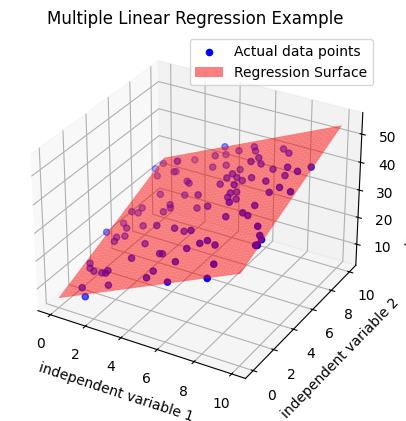

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

#generate sample data
np.random.seed(0)
x1=np.random.rand(100,1)*10
x2=np.random.rand(100,1)*10
y=3*x1+2*x2+5+np.random.randn(100,1)*2

#combine the features into one matrix
X=np.concatenate([x1,x2],axis=1)

#fit the mutiple linear regression model
model=LinearRegression()
model.fit(X,y)

#generate predictions
x1_vals = np.linspace(0, 10, 50)
x2_vals = np.linspace(0, 10, 50)
x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)


X_grid = np.c_[x1_grid.ravel(),x2_grid.ravel()]
y_pred = model.predict(X_grid)
y_pred_grid = y_pred.reshape(x1_grid.shape)

#plotting the results
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
#scatter plot of actual data
ax.scatter(x1,x2,y,color='blue',label='Actual data points')

#surface plot of the regression plane
ax.plot_surface(x1_grid,x2_grid,y_pred_grid,color='r',alpha=0.5,label='Regression Surface')

#labels and titles
ax.set_xlabel('independent variable 1')
ax.set_ylabel('independent variable 2')
ax.set_zlabel('dependent variable')
ax.set_title('Multiple Linear Regression Example')
ax.legend()
plt.show()